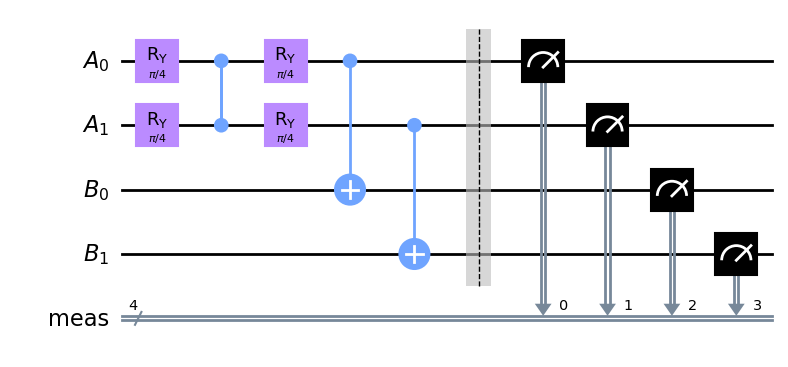

In [22]:
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
import numpy as np
from qiskit.primitives import BackendSampler
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler, Session, Options

sq = QuantumRegister(2, name="A")
aq = QuantumRegister(2, name="B")

qc = QuantumCircuit(sq, aq)
qc.ry(np.pi/4, sq[0])
qc.ry(np.pi/4, sq[1])

qc.cz(sq[0], sq[1])

qc.ry(np.pi/4, sq[0])
qc.ry(np.pi/4, sq[1])

qc.cx(sq[0], aq[0])
qc.cx(sq[1], aq[1])
qc.measure_all()
qc.draw('mpl')

In [25]:
shots = 2**16
backend = Aer.get_backend('aer_simulator_matrix_product_state')
backend.set_options()

sampler = BackendSampler(backend=backend)
sampler.set_options(shots=shots)

job = sampler.run(qc)
result = job.result()
quasi_dist = result.quasi_dists[0]
prob_dict = quasi_dist.binary_probabilities()

prob_dict

{'01': 0.36614990234375,
 '11': 0.0624542236328125,
 '10': 0.362579345703125,
 '00': 0.2088165283203125}

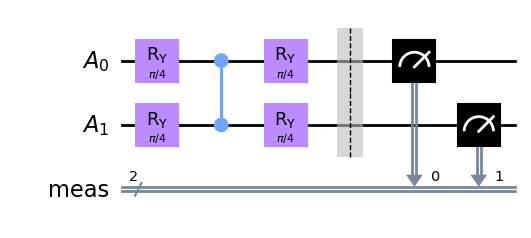

In [26]:
sq = QuantumRegister(2, name="A")

qc = QuantumCircuit(sq)
qc.ry(np.pi/4, sq[0])
qc.ry(np.pi/4, sq[1])

qc.cz(sq[0], sq[1])

qc.ry(np.pi/4, sq[0])
qc.ry(np.pi/4, sq[1])

qc.measure_all()
qc.draw('mpl')

In [27]:
shots = 2**16
backend = Aer.get_backend('aer_simulator_matrix_product_state')
backend.set_options()

sampler = BackendSampler(backend=backend)
sampler.set_options(shots=shots)

job = sampler.run(qc)
result = job.result()
quasi_dist = result.quasi_dists[0]
prob_dict = quasi_dist.binary_probabilities()

prob_dict

{'01': 0.3669586181640625,
 '11': 0.0618438720703125,
 '00': 0.2080230712890625,
 '10': 0.3631744384765625}

zsh:1: command not found: qiskit-aer


NameError: name 'qiskit' is not defined

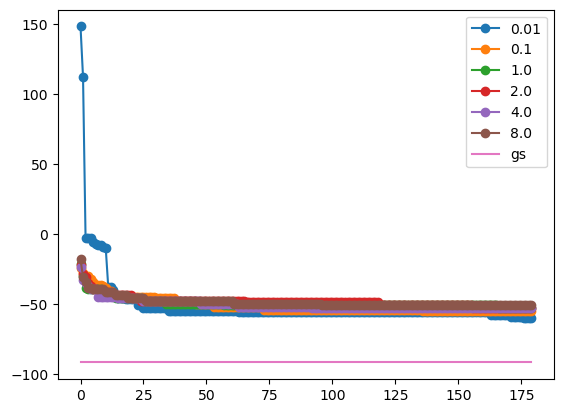

In [65]:
import os
import pickle
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt

beta_avg = defaultdict(list)
for beta in [0.01, 0.1, 1.0, 2.0, 4.0, 8.0]:
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('results/' + filename, 'rb') as fp:
            log = pickle.load(fp)
        beta_avg[str(beta)].append([log[i]*281.99999999999994 for i in range(len(log)) if i % 2 == 0])

    plt.plot(np.mean(beta_avg[str(beta)],axis=0), '-o')

plt.plot([-91.5 for x in range(0, len(beta_avg[str(beta)][0]))])
plt.legend([0.01, 0.1, 1.0, 2.0, 4.0, 8.0, 'gs'])

In [62]:
log

[-0.023758865248226953,
 (-0.08794326241134752,
  0.9454121587822821,
  -0.36553638547654654,
  0.09791625543689045),
 -0.08794326241134752,
 (-0.08794326241134752,
  1.0403940139663546,
  -0.42094809340647754,
  0.2743229859264185),
 -0.08794326241134752,
 (-0.09273049645390073,
  1.0311527770885682,
  -0.38115695225247975,
  0.16722966187389182),
 -0.09273049645390073,
 (-0.09273049645390073,
  0.9288452381746819,
  -0.3818325779298749,
  0.13905135350869896),
 -0.09273049645390073,
 (-0.10017730496453903,
  0.9578134334884317,
  -0.3946578534152478,
  0.19642866418716756),
 -0.10017730496453903,
 (-0.10212765957446811,
  1.0160453978423372,
  -0.3578836934711419,
  0.10202351022273932),
 -0.10212765957446811,
 (-0.10212765957446811,
  0.9765182535814565,
  -0.40939397549843193,
  0.23596600471658907),
 -0.10212765957446811,
 (-0.10212765957446811,
  0.999315619008865,
  -0.3242518038331601,
  0.12702206009668654),
 -0.10212765957446811,
 (-0.10212765957446811,
  1.0292781735925092,
